In [1]:
import pandas as pd
import numpy as np 
import sklearn 
import matplotlib as plt 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_excel("D:/BKEL/GE3107 - Kỹ thuật Vỉa dầu khí/BTL/Official/Data.xlsx")
df["Permeability"] = df['Klinkenberg permeability [mD]']
df["Porosity"] = df["Porosity [-]"]
df = df.drop(columns=['Klinkenberg permeability [mD]', 'Porosity [-]'])
df.describe()

,Sample number,Permeability,Porosity
count,189.000000,189.000000,189.000000
mean,95.000000,18.335881,0.149206
std,54.703748,26.712284,0.037158
min,1.000000,0.000100,0.030000
25%,48.000000,0.110700,0.140000
50%,95.000000,11.161900,0.160000
75%,142.000000,24.348500,0.170000
max,189.000000,182.156600,0.230000


Text(0, 0.5, 'Porosity')

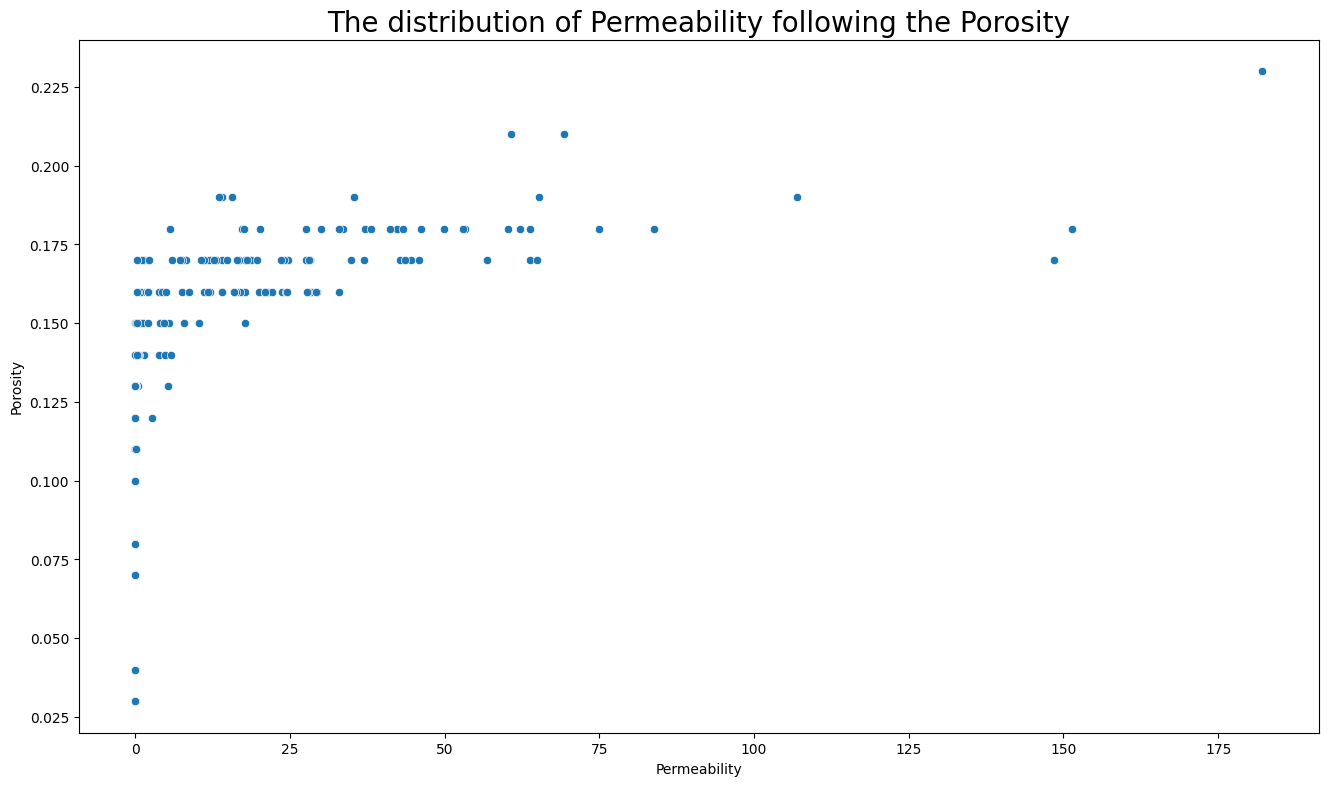

In [3]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='Permeability',y='Porosity')
plt.title('The distribution of Permeability following the Porosity',fontsize=20)
plt.xlabel('Permeability')
plt.ylabel('Porosity')

In [4]:
df = df[df['Permeability'] < 100]

Text(0, 0.5, 'Porosity')

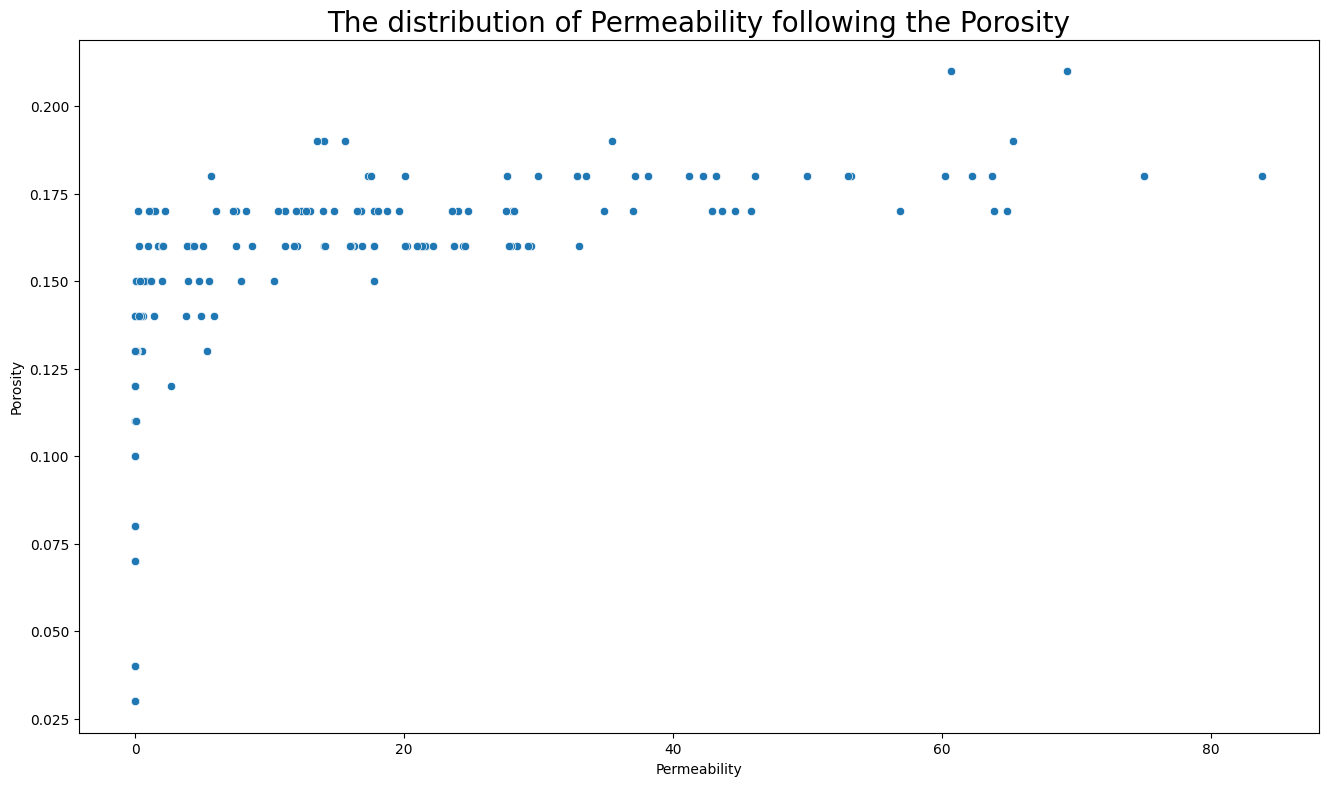

In [5]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='Permeability',y='Porosity')
plt.title('The distribution of Permeability following the Porosity',fontsize=20)
plt.xlabel('Permeability')
plt.ylabel('Porosity')

In [5]:
df_minmaxscaler_data = df[['Permeability', 'Porosity']]


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_minmaxscaler_data["Permeability_normalized"] = scaler.fit_transform(df_minmaxscaler_data[["Permeability"]])
df_minmaxscaler_data.drop(columns="Permeability")
df_minmaxscaler_data["Permeability"] = df_minmaxscaler_data["Permeability_normalized"]

In [7]:
df_minmaxscaler_data
df_minmaxscaler_data.drop(columns="Permeability_normalized")

,Permeability,Porosity
0,0.778342,0.19
1,0.223508,0.17
2,0.257927,0.16
3,0.240422,0.16
4,0.282898,0.16
...,...,...
184,0.003151,0.16
185,0.000729,0.15
186,0.004361,0.15
187,0.000217,0.12


Text(0, 0.5, 'Porosity')

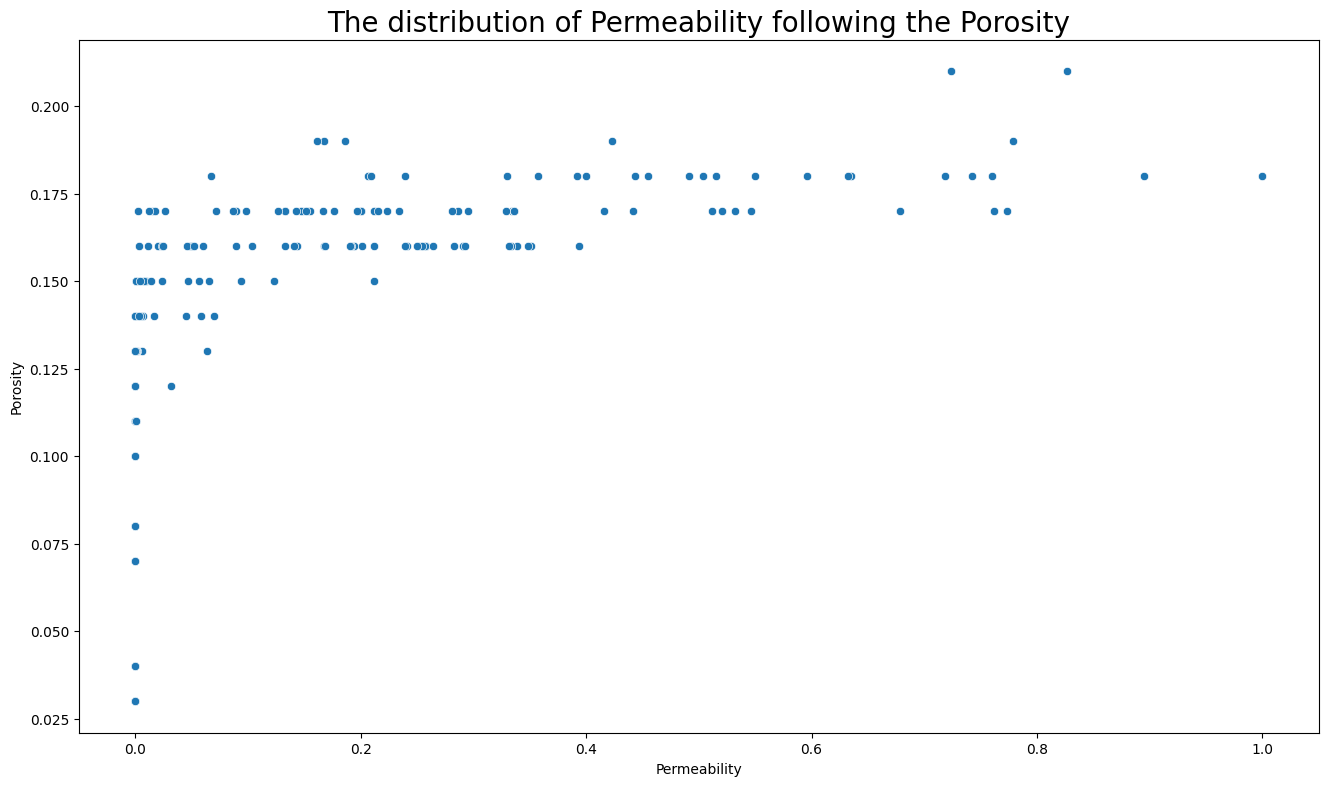

In [8]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df_minmaxscaler_data,x='Permeability',y='Porosity')
plt.title('The distribution of Permeability following the Porosity',fontsize=20)
plt.xlabel('Permeability')
plt.ylabel('Porosity')

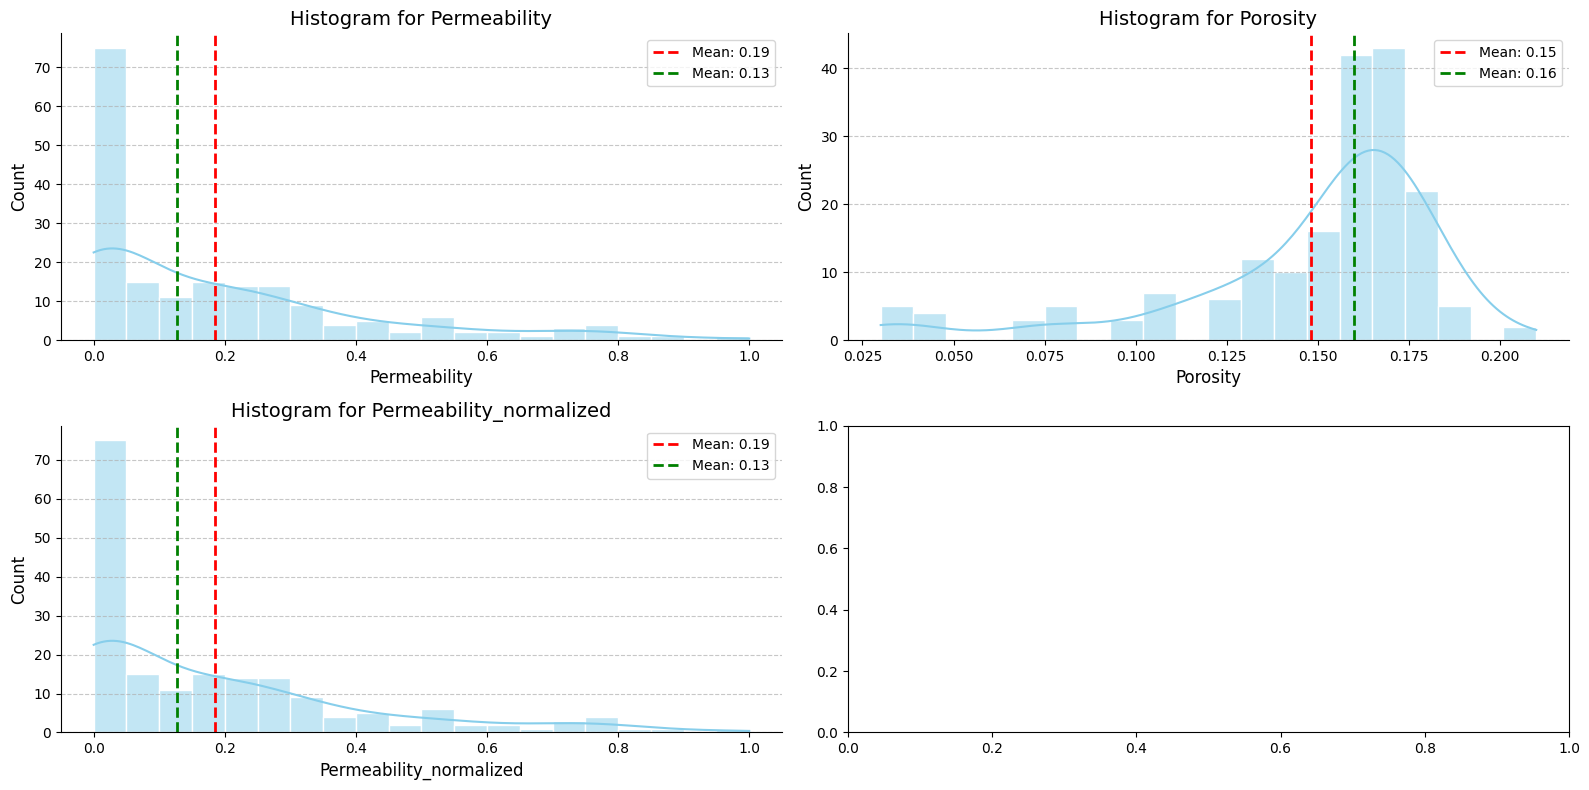

In [9]:
# Set the number of subplots based on the number of eligible columns
eligible_columns = [x for x in df_minmaxscaler_data if df_minmaxscaler_data[x].dtype != 'O' and x != 'lat' and x != 'lng']
num_subplots = len(eligible_columns)
# Set the number of columns in the subplot grid
num_cols = 2  # Adjust the number of columns as needed
num_rows = (num_subplots + 1) // num_cols
# Set the overall figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
# Flatten the axes if needed (for handling single-row or single-column subplots)
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)
# Loop through eligible columns and create subplots
for i, x in enumerate(eligible_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    # Use sns.histplot for better customization and aesthetics
    sns.histplot(df_minmaxscaler_data[x], kde=True, ax=axes[row_idx, col_idx], color='skyblue', bins=20, edgecolor='white')
    # Customize the subplot
    axes[row_idx, col_idx].set_xlabel(x, fontsize=12)
    axes[row_idx, col_idx].set_ylabel('Count', fontsize=12)
    axes[row_idx, col_idx].set_title(f'Histogram for {x}', fontsize=14)
    # Set grid and style
    axes[row_idx, col_idx].grid(axis='y', linestyle='--', alpha=0.7)
    axes[row_idx, col_idx].spines['right'].set_visible(False)
    axes[row_idx, col_idx].spines['top'].set_visible(False)
    # Add mean line
    mean_val = df_minmaxscaler_data[x].mean()
    axes[row_idx, col_idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row_idx, col_idx].legend()
    # Add median line
    mean_val = df_minmaxscaler_data[x].median()
    axes[row_idx, col_idx].axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row_idx, col_idx].legend()
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

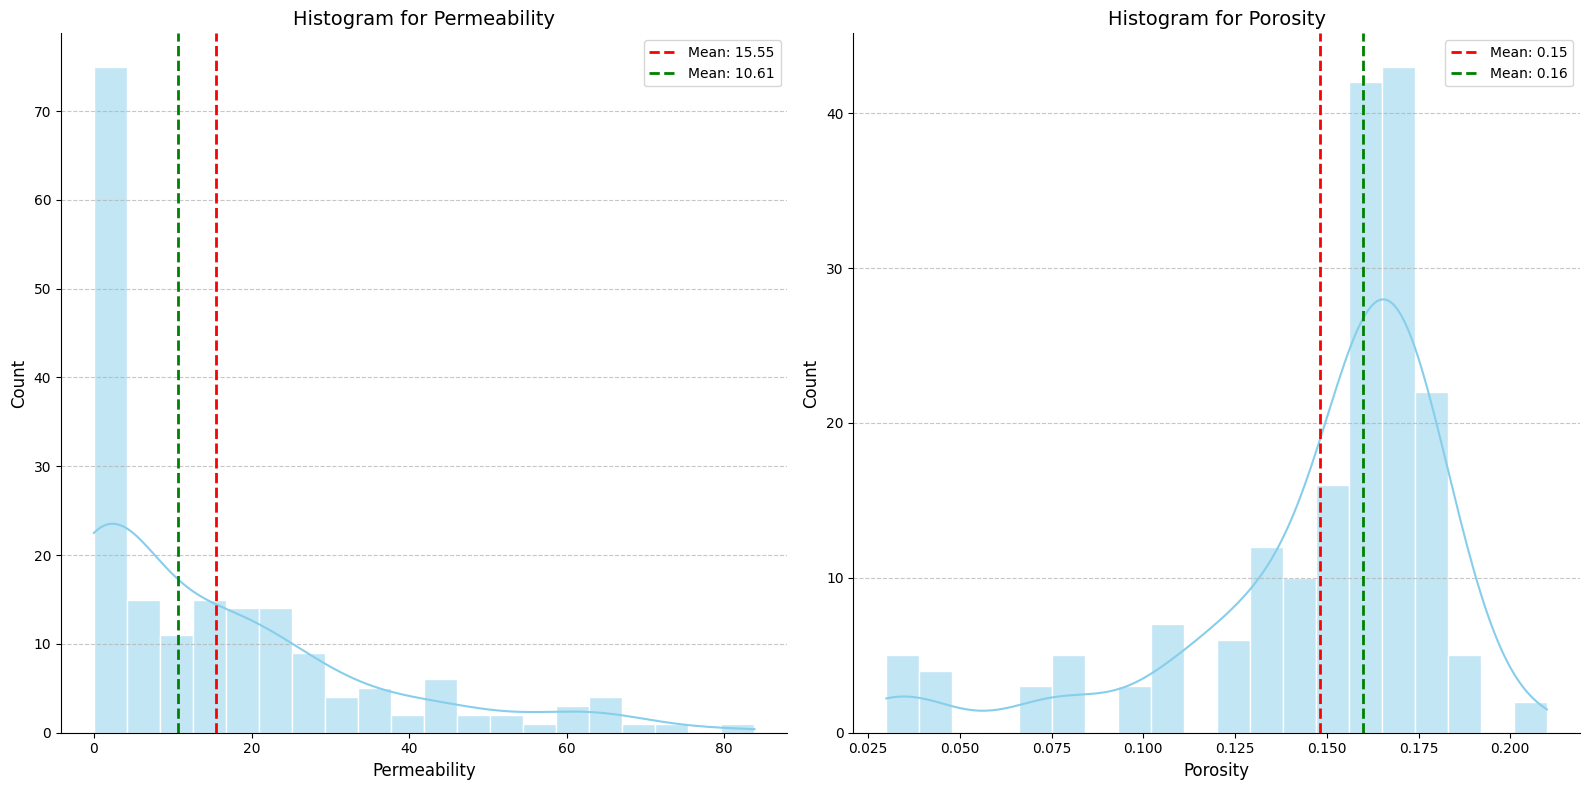

In [10]:
# Set the number of subplots based on the number of eligible columns
eligible_columns = [x for x in df if df[x].dtype != 'O' and x != 'Sample number' and x != 'lng']
num_subplots = len(eligible_columns)
# Set the number of columns in the subplot grid
num_cols = 2  # Adjust the number of columns as needed
num_rows = (num_subplots + 1) // num_cols
# Set the overall figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
# Flatten the axes if needed (for handling single-row or single-column subplots)
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)
# Loop through eligible columns and create subplots
for i, x in enumerate(eligible_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    # Use sns.histplot for better customization and aesthetics
    sns.histplot(df[x], kde=True, ax=axes[row_idx, col_idx], color='skyblue', bins=20, edgecolor='white')
    # Customize the subplot
    axes[row_idx, col_idx].set_xlabel(x, fontsize=12)
    axes[row_idx, col_idx].set_ylabel('Count', fontsize=12)
    axes[row_idx, col_idx].set_title(f'Histogram for {x}', fontsize=14)
    # Set grid and style
    axes[row_idx, col_idx].grid(axis='y', linestyle='--', alpha=0.7)
    axes[row_idx, col_idx].spines['right'].set_visible(False)
    axes[row_idx, col_idx].spines['top'].set_visible(False)
    # Add mean line
    mean_val = df[x].mean()
    axes[row_idx, col_idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row_idx, col_idx].legend()
    # Add median line
    mean_val = df[x].median()
    axes[row_idx, col_idx].axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row_idx, col_idx].legend()
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### Silhouette Method

In [11]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
X = df_minmaxscaler_data[["Permeability", "Porosity"]]
si = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    si.append(score)

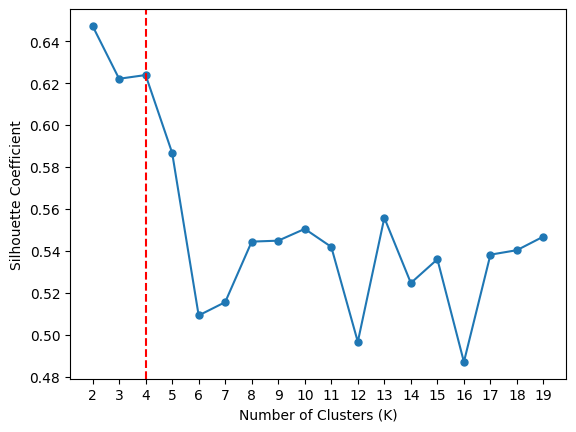

In [12]:
#Vẽ biểu đồ độ chính xác Silhouette 
plt.plot(range(2, 20), si,'.-',markersize=10) 
plt.xticks(range(2, 20)) 
plt.axvline(x=4, color='r', linestyle='--') 
plt.xlabel("Number of Clusters (K)") 
plt.ylabel("Silhouette Coefficient") 
plt.show()

### Elbow Method

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_/1000)

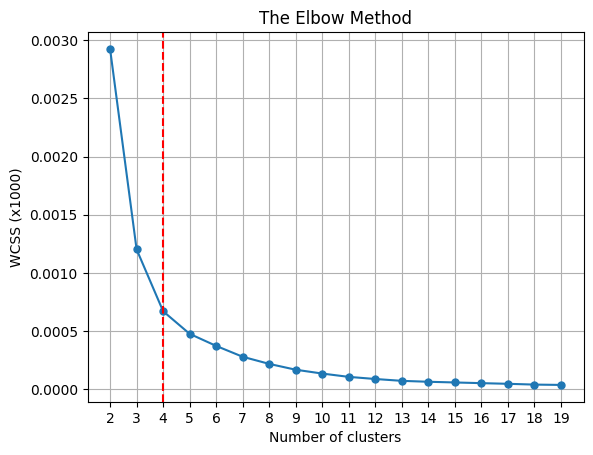

In [14]:
#Vẽ biểu đồ độ chính xác Elbow 
plt.plot(range(2, 20), wcss,'.-',markersize=10) 
plt.xticks(range(2, 20)) 
plt.axvline(x=4, color='r', linestyle='--') 
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('WCSS (x1000)') 
plt.grid(linestyle='-') 
plt.show()

### Hierachical Clustering

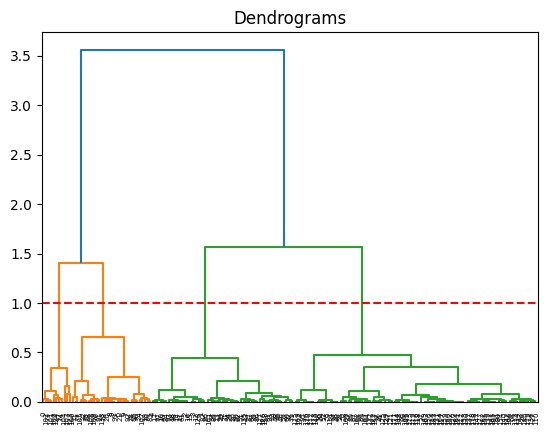

In [15]:
from sklearn.preprocessing import normalize 
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import pandas as pd

plt.title("Dendrograms") 
dend = shc.dendrogram(shc.linkage(X, method='ward'))  # Use the normalized data
plt.axhline(y=1, color='r', linestyle='--') 
plt.axhline(y=5, color='green', linestyle='--')

plt.show()

### Modeling 

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
Hierachical = AgglomerativeClustering(n_clusters=4)
HFU = Hierachical.fit_predict(X)

In [17]:
HFU

array([3, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 0, 0, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 1, 1, 0, 0, 2, 2, 1, 0, 2, 2, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 2, 2, 2, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [18]:
df['HFU'] = HFU

In [19]:
df

,Sample number,Permeability,Porosity,HFU
0,1,65.2550,0.19,3
1,2,18.7386,0.17,2
2,3,21.6243,0.16,2
3,4,20.1567,0.16,2
4,5,23.7178,0.16,2
...,...,...,...,...
184,185,0.2643,0.16,1
185,186,0.0612,0.15,1
186,187,0.3657,0.15,1
187,188,0.0183,0.12,1


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17400\1177801709.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='HFU', palette='copper_r')
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ADMI

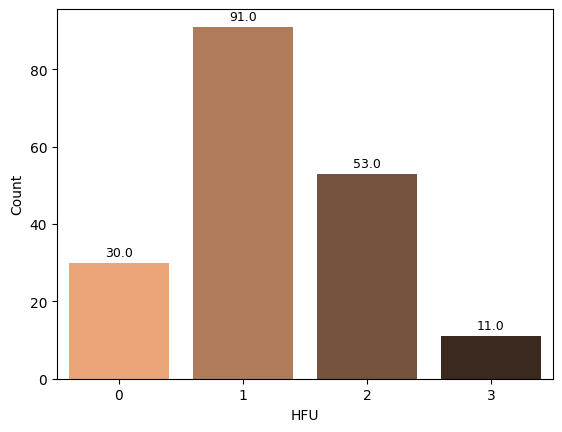

In [20]:
ax = sns.countplot(data=df, x='HFU', palette='copper_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_xlabel('HFU')
ax.set_ylabel('Count')
plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

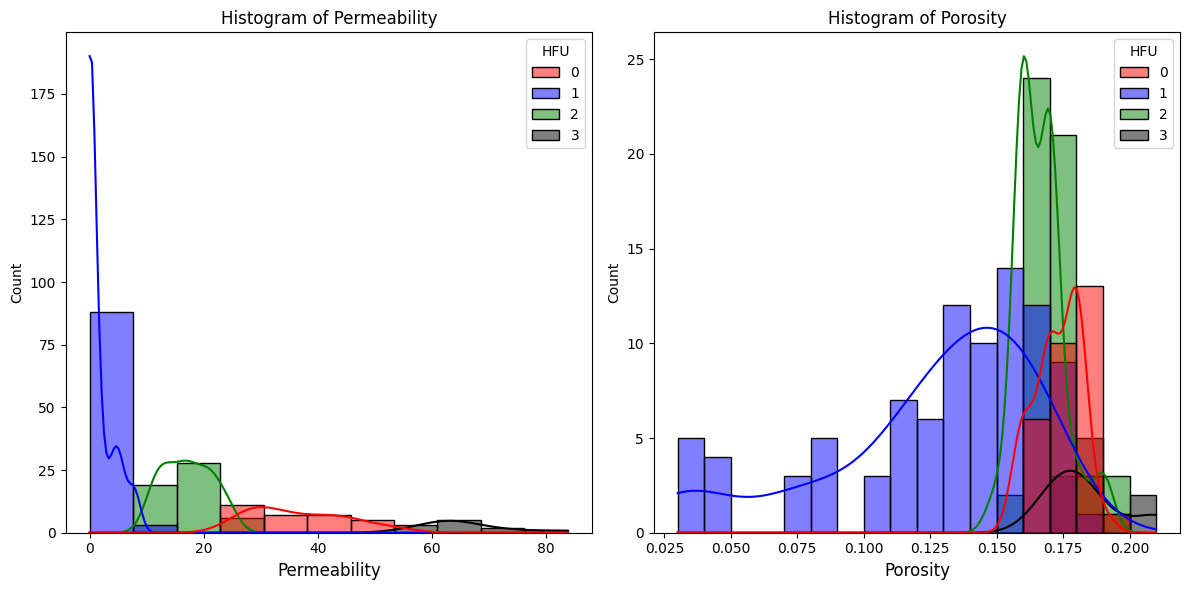

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
columns_to_plot = [col for col in df.columns if col not in ['HFU', 'Sample number']]
palette = ['red', 'blue', 'green', 'k']
for i, column in enumerate(columns_to_plot):
    sns.histplot(x=column, hue='HFU', data=df, palette=palette, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column, fontsize=12)
plt.tight_layout()

plt.show()


Text(0, 0.5, 'Porosity')

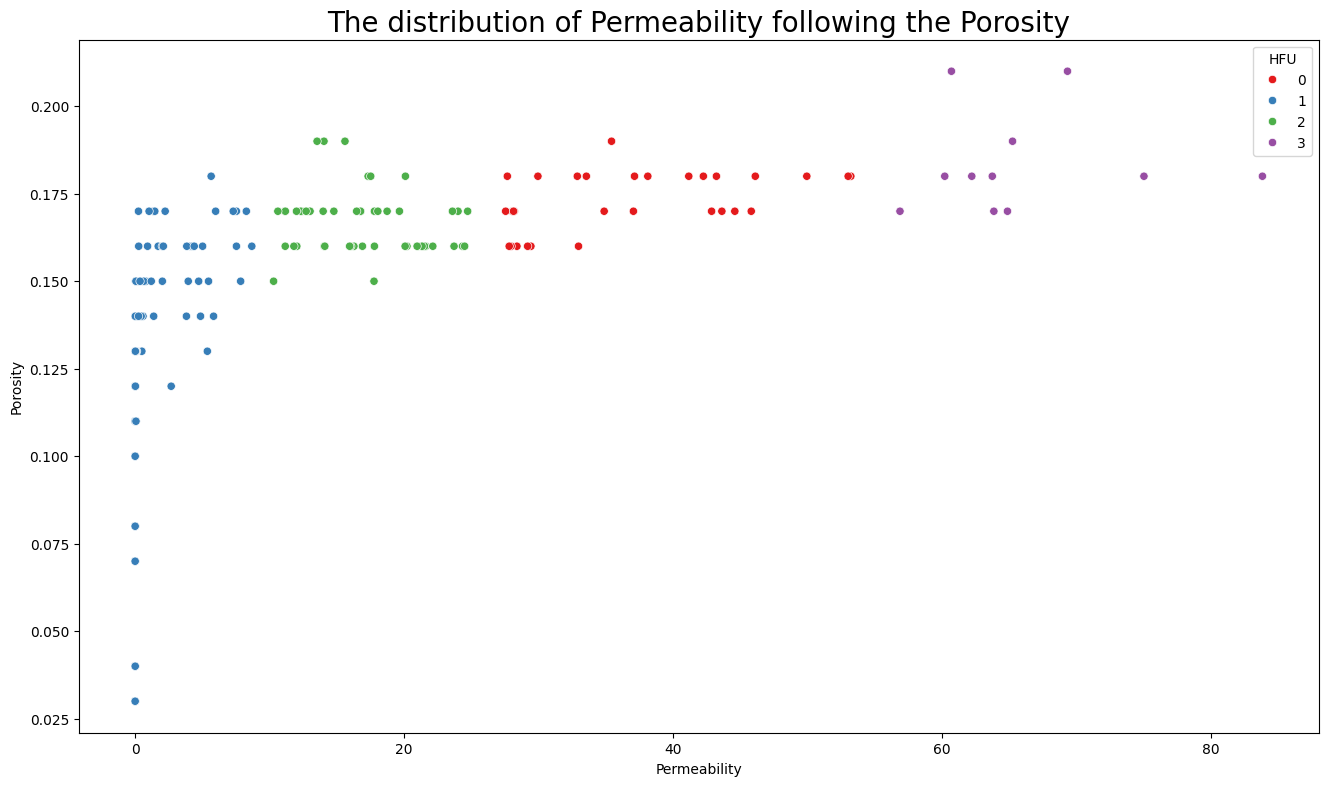

In [26]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='Permeability',y='Porosity',hue='HFU',palette='Set1')
plt.title('The distribution of Permeability following the Porosity',fontsize=20)
plt.xlabel('Permeability')
plt.ylabel('Porosity')

In [23]:
import numpy as np
import pandas as pd

# Tính fzi_ave và predicted_k cho từng nhóm HFU
grouped_df = df.groupby('HFU')

fzi_aves = []
predicted_ks = []

for hf, group_data in grouped_df:
    # Tính FZI trung bình của nhóm
    fzi_ave = np.mean(0.0314 * np.sqrt(group_data['Permeability'] / group_data['Porosity']) / (group_data['Porosity'] / (1 - group_data['Porosity'])))
    fzi_aves.append(fzi_ave)
    
    # Tính K dự đoán của nhóm
    predicted_k = 1014 * fzi_ave**2 * (group_data['Porosity']**3) / ((1 - group_data['Porosity'])**2)
    predicted_ks.append(predicted_k)

    # Gán giá trị dự đoán vào DataFrame
    df.loc[df['HFU'] == hf, 'predicted_K'] = predicted_k

# In ra kết quả
for i, (fzi_ave, predicted_k) in enumerate(zip(fzi_aves, predicted_ks), 1):
    print(f"Nhóm HFU {i}:")
    print(f"FZI trung bình: {fzi_ave}")
    print()


Nhóm HFU 1:
FZI trung bình: 2.1742401054146843

Nhóm HFU 2:
FZI trung bình: 0.3836848105421738

Nhóm HFU 3:
FZI trung bình: 1.5977758508461775

Nhóm HFU 4:
FZI trung bình: 2.671068261808912



In [24]:
df

,Sample number,Permeability,Porosity,HFU,predicted_K
0,1,65.2550,0.19,3,75.630800
1,2,18.7386,0.17,2,18.461213
2,3,21.6243,0.16,2,15.026957
3,4,20.1567,0.16,2,15.026957
4,5,23.7178,0.16,2,15.026957
...,...,...,...,...,...
184,185,0.2643,0.16,1,0.866540
185,186,0.0612,0.15,1,0.697306
186,187,0.3657,0.15,1,0.697306
187,188,0.0183,0.12,1,0.333093


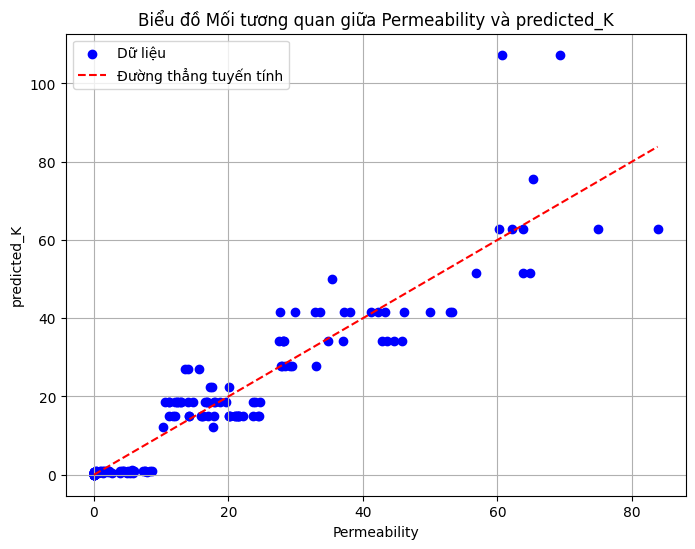

Hệ số xác định R^2: 0.8625129650980954


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Dữ liệu Permeability và Predicted_K
permeability = df['Permeability']
predicted_k = df['predicted_K']

# Vẽ biểu đồ mối tương quan
plt.figure(figsize=(8, 6))
plt.scatter(permeability, predicted_k, color='blue', label='Dữ liệu')
plt.plot([min(permeability), max(permeability)], [min(permeability), max(permeability)], color='red', linestyle='--', label='Đường thẳng tuyến tính')
plt.title('Biểu đồ Mối tương quan giữa Permeability và predicted_K')
plt.xlabel('Permeability')
plt.ylabel('predicted_K')
plt.legend()
plt.grid(True)
plt.show()

# Tính hệ số xác định R^2
r_squared = r2_score(permeability, predicted_k)
print("Hệ số xác định R^2:", r_squared)
